In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

# New Section

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
df_green_2019 =pd.read_csv('/content/drive/MyDrive/NYC/2019/combined/2019_green_combined.csv')



In [32]:
df_green_2019.head(5)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2018-12-21 15:17:29,2018-12-21 15:18:57,N,1.0,264,264,5.0,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2.0,1.0,NaN
1,2.0,2019-01-01 00:10:16,2019-01-01 00:16:32,N,1.0,97,49,2.0,0.86,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,NaN
2,2.0,2019-01-01 00:27:11,2019-01-01 00:31:38,N,1.0,49,189,2.0,0.66,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,1.0,1.0,NaN
3,2.0,2019-01-01 00:46:20,2019-01-01 01:04:54,N,1.0,189,17,2.0,2.68,13.5,0.5,0.5,2.96,0.0,NaN,0.3,19.71,1.0,1.0,NaN
4,2.0,2019-01-01 00:19:06,2019-01-01 00:39:43,N,1.0,82,258,1.0,4.53,18.0,0.5,0.5,0.00,0.0,NaN,0.3,19.30,2.0,1.0,NaN


In [33]:
df_green_2019.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044050 entries, 0 to 6044049
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        float64
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  ehail_fee              float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  payment_type           float64
 18  trip_type              float64
 19  congestion_surcharge   float64
dtypes: float64(15), int64(2), object(3)
memory usage: 922.2+ MB


In [34]:
print("Shape of dataset = ",df_green_2019.shape)


Shape of dataset =  (6044050, 20)


In [35]:
df_green_2019.isnull().sum()



VendorID                  414107
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag        414107
RatecodeID                414107
PULocationID                   0
DOLocationID                   0
passenger_count           414107
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                6043696
improvement_surcharge          2
total_amount                   0
payment_type              414107
trip_type                 414466
congestion_surcharge      960489
dtype: int64

In [36]:
df_green_2019.dropna()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


In [37]:
df_green_2019.dropna(axis = 1, how ='all', inplace= True)

In [38]:
df_green_2019.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2018-12-21 15:17:29,2018-12-21 15:18:57,N,1.0,264,264,5.0,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2.0,1.0,NaN
1,2.0,2019-01-01 00:10:16,2019-01-01 00:16:32,N,1.0,97,49,2.0,0.86,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,NaN
2,2.0,2019-01-01 00:27:11,2019-01-01 00:31:38,N,1.0,49,189,2.0,0.66,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,1.0,1.0,NaN
3,2.0,2019-01-01 00:46:20,2019-01-01 01:04:54,N,1.0,189,17,2.0,2.68,13.5,0.5,0.5,2.96,0.0,NaN,0.3,19.71,1.0,1.0,NaN
4,2.0,2019-01-01 00:19:06,2019-01-01 00:39:43,N,1.0,82,258,1.0,4.53,18.0,0.5,0.5,0.00,0.0,NaN,0.3,19.30,2.0,1.0,NaN


In [39]:
df_green_2019.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,5.629943e+06,5.629943e+06,6.044050e+06,6.044050e+06,5.629943e+06,6.044050e+06,6.044050e+06,6.044050e+06,6.044050e+06,6.044050e+06,6.044050e+06,354.000000,6.044048e+06,6.044050e+06,5.629943e+06,5.629584e+06,5.083561e+06
mean,1.841199e+00,1.186886e+00,1.084717e+02,1.292570e+02,1.310093e+00,3.303150e+00,1.442893e+01,5.376410e-01,4.825997e-01,9.843494e-01,2.530078e-01,0.016525,2.690442e-01,1.726119e+01,1.439895e+00,1.044463e+00,3.986029e-01
std,3.654905e-01,8.865917e-01,7.173679e+01,7.650462e+01,9.708296e-01,3.435201e+01,1.316129e+01,8.476131e-01,1.000936e-01,2.017130e+00,1.365045e+00,0.179003,9.412292e-02,1.447000e+01,5.202254e-01,2.061218e-01,9.679345e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.032908e+04,-8.900000e+02,-4.500000e+00,-5.000000e-01,-9.050000e+01,-2.100000e+01,0.000000,-3.000000e-01,-8.903000e+02,1.000000e+00,1.000000e+00,-2.750000e+00
25%,2.000000e+00,1.000000e+00,5.200000e+01,6.500000e+01,1.000000e+00,1.060000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000,3.000000e-01,8.750000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.950000e+00,1.050000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000,3.000000e-01,1.280000e+01,1.000000e+00,1.000000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,3.920000e+00,1.800000e+01,1.000000e+00,5.000000e-01,1.650000e+00,0.000000e+00,0.000000,3.000000e-01,2.130000e+01,2.000000e+00,1.000000e+00,0.000000e+00
max,2.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,7.784376e+04,4.011500e+03,1.158000e+01,1.733000e+01,4.410000e+02,9.355000e+02,1.950000,4.700000e-01,4.012300e+03,5.000000e+00,2.000000e+00,2.750000e+00


In [40]:
df_green_2019.isnull().sum()


VendorID                  414107
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag        414107
RatecodeID                414107
PULocationID                   0
DOLocationID                   0
passenger_count           414107
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                6043696
improvement_surcharge          2
total_amount                   0
payment_type              414107
trip_type                 414466
congestion_surcharge      960489
dtype: int64

In [41]:
df_green_2019.dropna(subset = ["trip_type"],inplace= True)


In [42]:
#All nul values cleared
df_green_2019.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                5629584
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      0
congestion_surcharge      546380
dtype: int64

In [43]:
#Remove 0 passenger count .
#the taxi fare initial charge is ($2.5) ,so we are removing fare amount smaller than this amount

In [45]:
#removing outlinear values.
df_green_2019 = df_green_2019[(df_green_2019['passenger_count'] > 0)]
                              

In [46]:
df_green_2019 = df_green_2019[(df_green_2019['fare_amount'] >= 2.5)]

In [47]:
df_green_2019 = df_green_2019[(df_green_2019['trip_distance'] > 0)]

In [48]:
df_green_2019 = df_green_2019[(df_green_2019['extra'] > 0)]

In [49]:
df_green_2019 = df_green_2019[(df_green_2019['mta_tax'] > 0)]

In [50]:
df_green_2019= df_green_2019[(df_green_2019['tolls_amount'] > 0)]

In [51]:
df_green_2019 = df_green_2019[(df_green_2019['improvement_surcharge'] > 0)]

In [52]:
df_green_2019 = df_green_2019[(df_green_2019['total_amount'] >= 2.5)]

In [53]:
df_green_2019.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,84178.000000,84178.000000,84178.000000,84178.000000,84178.000000,84178.000000,84178.000000,84178.000000,84178.0,84178.000000,84178.000000,8.417800e+04,84178.000000,84178.000000,84178.0
mean,1.880765,1.045012,125.986018,142.824040,1.389722,12.601528,39.767855,0.816448,0.5,2.595186,5.752218,3.000000e-01,49.778964,1.203355,1.0
std,0.324067,0.292958,74.731416,73.365835,1.049941,6.506109,19.460547,0.623342,0.0,4.286718,2.025426,4.499206e-13,20.372392,0.410244,0.0
min,1.000000,1.000000,3.000000,1.000000,1.000000,0.010000,2.500000,0.500000,0.5,0.000000,0.010000,3.000000e-01,5.300000,1.000000,1.0
25%,2.000000,1.000000,74.000000,79.000000,1.000000,7.420000,24.500000,0.500000,0.5,0.000000,5.760000,3.000000e-01,34.560000,1.000000,1.0
50%,2.000000,1.000000,106.000000,138.000000,1.000000,11.810000,37.000000,0.500000,0.5,0.000000,5.760000,3.000000e-01,47.560000,1.000000,1.0
75%,2.000000,1.000000,191.000000,208.000000,1.000000,16.900000,52.000000,1.000000,0.5,5.000000,5.760000,3.000000e-01,62.060000,1.000000,1.0
max,2.000000,4.000000,265.000000,265.000000,6.000000,137.890000,622.000000,4.500000,0.5,170.000000,150.000000,3.000000e-01,645.320000,5.000000,1.0


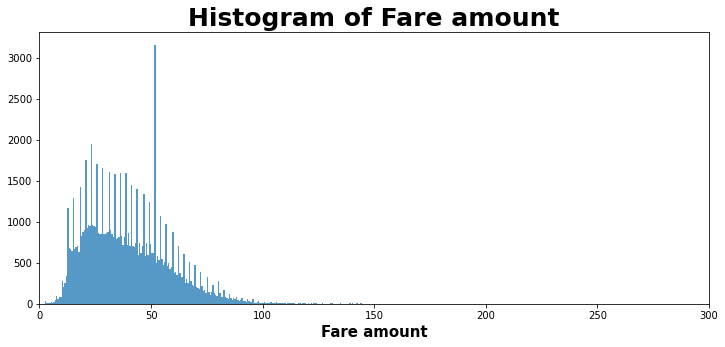

In [54]:
#target value = target amount 
plt.figure(figsize = (12,5))
n,bins,patches = plt.hist(df_green_2019.fare_amount, 1000,alpha=0.75)
plt.xlabel('Fare amount',fontsize=15,fontweight='bold')
plt.title('Histogram of Fare amount',fontsize=25,fontweight='bold')
plt.xlim(0,300)
plt.show();


Text(0.5, 1.0, 'Histogram of Fare amount')

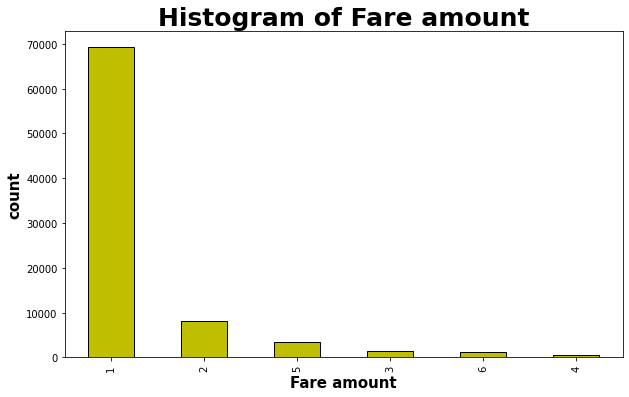

In [55]:
plt.figure(figsize = (10,6))
df_green_2019['passenger_count'].value_counts().plot.bar(color = 'y' , edgecolor = 'k')
plt.xlabel('Fare amount',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=15,fontweight='bold')
plt.title('Histogram of Fare amount',fontsize=25,fontweight='bold')
## passenger count